# Loading and Visualizing LiPD Proxy Data in Python

By Michael Erb (michael.erb@nau.edu), October 28, 2022

## Introduction

Proxy records (e.g., ice cores, sediment cores, and speleothems) provide the main source of climate information used in paleoclimate data assimilation.  Recent efforts have compiled proxy data into large machine-readible databases.

In this notebook, we'll load and plot proxy data from the Temperature 12k database v. 1.0.2, which can be visualized here: https://lipdverse.org/Temp12k/1_0_2/. The data can be downloaded on the left side of that page.

## 1. Setting up Google Colab

This notebook was made in Google Colab. The first cell below sets up Google Colab. If you're using this code in a different environment, you can probably skip this first code cell.

In [1]:
# Install lipd and cartopy
!pip install lipd
!pip install cartopy==0.19.0.post1

# In Google Colab, cartopy and shapely don't get along well. These lines are only necessary in Google Colab, to make sure cartopy works correctly
!pip install --no-binary shapely shapely --force
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings('ignore',category=ShapelyDeprecationWarning)

# Mount Google Drive locally
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Shapely-1.8.5.post1.tar.gz (200 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp37-cp37m-linux_x86_64.whl size=669758 sha256=428e5bc0ba8c0d2276808128cce7c74f6c5bf4d614da2b36dba574cb4179c95d
  Stored in directory: /root/.cache/pip/wheels/a3/07/7c/cc50e8ecc795963726466b22ecd395ee1e2a28da87a4cdeb56
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.5.post1
    Uninstalling Shapely-1.8.5.post1:
      Successfully uninstalled Shapely-1.8.5.post1
Drive

## 2. Importing necessary libraries

Python libraries provide additional functionality. Here, we import some that will be used later.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pickle
import lipd
plt.style.use('ggplot')  # This sets the plotting style for the figures we'll be making later.

## 3. Loading proxy data

Now, let's load the Temp12k database v1.0.2 (https://lipdverse.org/Temp12k/1_0_2/). In python, we can either load lipd files or a pickle file. The two code cells below demonstrate this. You only need to do one or the other, depending on what data format you download. The pickle file is significantly faster to load.

If you download the lipd files, unzip the folder. You can load multiple files in the folder (see below) or specify a single file instead.

In [3]:
# Load the Temp12k proxy metadata
data_dir = '/content/drive/MyDrive/using_lipd_files/lipd_data/'  # Update this line to where your data is stored.
file_to_open = open(data_dir+'Temp12k1_0_2.pkl','rb')
proxies_all = pickle.load(file_to_open)['D']
file_to_open.close()

In [4]:
# Load the Temp12k proxy metadata
data_dir = '/content/drive/MyDrive/using_lipd_files/lipd_data/Temp12k1_0_2/'  # Update this line to where your data is stored.
proxies_all = lipd.readLipd(data_dir)

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 698 LiPD file(s)
reading: 117_723A.Godad.2011.lpd
reading: CF8.Axford.2011.lpd
reading: Century.Johnsen.1972.lpd
reading: CarletonLake.Upiter.2014.lpd
reading: Castor.Larouche.NA.lpd
reading: CascadeFen.Maher.1963.lpd
reading: CC04.Gibb.2015.lpd
reading: CaribouHill.Lamb.1985.lpd
reading: Caribou-Qubec.Jett.1992.lpd
reading: Carp.Whitlock.1985.lpd
reading: CapeGhir.Kim.2007.lpd
reading: CangoCave.Talma.1992.lpd
reading: brurskardstjorni.Velle.2005.lpd
reading: Breitnau-Neuhof.Roesch.2009.lpd
reading: CandelabraLake.Cwynar.1995.lpd
reading: Camp11.Brubaker.1975.lpd
reading: BS79_38.Cacho.2001.lpd
reading: BrayaSo.vonGunten.2012.lpd
reading: BuntesMoor.Weirich.1980.lpd
reading: Cadagno.Niemann.2012.lpd
reading: BoundaryPond.Mott.1977.lpd
reading: BolshieToroki.Zhilich.2017.lpd
reading: BorderBeacon.Lamb.1985.lpd
reading: Boone.White.1986.lpd
reading: BoehnigseeGoldmoos.Markgraf.1969.lpd
reading: Bjornfjell.

The commands below will do several things:
- Extract proxy record time series
- Select the proxy records which are in the Temp12k collection and have units of degrees Celsius. Feel free to change this to focus on the records you're interested in.

In [5]:
# Extract the time series and use only those which are in Temp12k and in units of degC
all_ts = lipd.extractTs(proxies_all)
proxy_ts = lipd.filterTs(all_ts,  'paleoData_inCompilation == Temp12k')
proxy_ts = lipd.filterTs(proxy_ts,'paleoData_units == degC')
n_proxies = len(proxy_ts)

extracting paleoData...
extracting: 117_723A.Godad.2011
extracting: CF8.Axford.2011
extracting: Century.Johnsen.1972
extracting: CarletonLake.Upiter.2014
extracting: Castor.Larouche.NA
extracting: CascadeFen.Maher.1963
extracting: CC04.Gibb.2015
extracting: CaribouHill.Lamb.1985
extracting: Caribou-Qubec.Jett.1992
extracting: Carp.Whitlock.1985
extracting: CapeGhir.Kim.2007
extracting: CangoCave.Talma.1992
extracting: brurskardstjorni.Velle.2005
extracting: Breitnau-Neuhof.Roesch.2009
extracting: CandelabraLake.Cwynar.1995
extracting: Camp11.Brubaker.1975
extracting: BS79_38.Cacho.2001
extracting: BrayaSo.vonGunten.2012
extracting: BuntesMoor.Weirich.1980
extracting: Cadagno.Niemann.2012
extracting: BoundaryPond.Mott.1977
extracting: BolshieToroki.Zhilich.2017
extracting: BorderBeacon.Lamb.1985
extracting: Boone.White.1986
extracting: BoehnigseeGoldmoos.Markgraf.1969
extracting: Bjornfjell.Brooks.2006
extracting: BloodPond.Marsicek.2013
extracting: BJ8_03_70GGC.Linsley.2010
extracting:

## 4. Exploring the Proxy Metadata

The proxy database is now stored as a list called "proxy_ts", which is 1276 entries long. Each entry in the list is a dictionary. You can see for yourself:

In [6]:
print(type(proxy_ts),len(proxy_ts))
print(type(proxy_ts[0]))

<class 'list'> 1276
<class 'dict'>


Python is a 0 indexed language, so to print the first proxy record, we would use the command:

In [7]:
print(proxy_ts[0])

{'mode': 'paleoData', 'time_id': 68.418772721, 'archiveType': 'MarineSediment', 'createdBy': 'PalMod2LiPD', 'dataSetName': '117_723A.Godad.2011', 'lipdverseLink': 'http://lipdverse.org/Temp12k/1_0_2/117_723A.Godad.2011.html', 'maxYear': 22260, 'minYear': 500, 'nUniqueAges': 11, 'nUniqueOtherAges': 0, 'otherAgesPerKyr': '0', 'hasDepth': 1, 'nUniqueGoodAges': 11, 'agesPerKyr': 0.9565, 'lipdComplete': '100%', 'datasetId': 'tmeZsxjY5oSP1dOcgrJW', 'originalDataUrl': '10.1594/PANGAEA.775098,10.1594/PANGAEA.695217', 'changelog': [{'version': '1.0.1', 'lastVersion': '1.0.0', 'curator': 'nick', 'timestamp': '2020-10-08 12:40:16 UTC', 'changes': {'Paleo Column metadata': [["temperature (RVwo44cKoew): paleoData_proxyGeneral: '' has been replaced by 'other microfossil'"]]}}, {'version': '1.0.0', 'curator': 'nick', 'timestamp': '2020-08-21 15:34:35 UTC', 'notes': 'This marks the creation of the changelog, and marks the status of this dataset as of Temp12k version 1.0.1', 'changes': {'Setup': [['Cha

As you can see, there's a lot of data and metadata. Since "proxy_ts[0]" is a dictionary, we need to use the right key to get a specific piece of data or metadata from it. To see all of the keys, you could use the command:

> print(proxy_ts[0].keys())

Some of the more important keys are:

| Key | Explanation |
| --- | --- |
| paleoData_values | The proxy record data |
| age | The proxy record ages |
| dataSetName | Data set name |
| paleoData_TSid | The "TSid," which is a unique identifier for the proxy record |
| archiveType | Archive type |
| paleoData_proxyGeneral | General proxy type |
| paleoData_proxy | Specific proxy type |
| paleoData_variableName | Variable |
| geo_meanLat | Latitude (-90 to 90) |
| geo_meanLon | Longitude (-180 to 180) |
| geo_meanElev | Elevation (m) |
| paleoData_interpretation | Notes about the interpretation of the proxy record |
| originalDataUrl | The URL of the original proxy record |
| paleoData_units | Units of the data |
| ageUnits | Units of the ages |

To demonstrate how keys are used, the code below gets some data and metadata from the proxy record, then makes a simple figure.

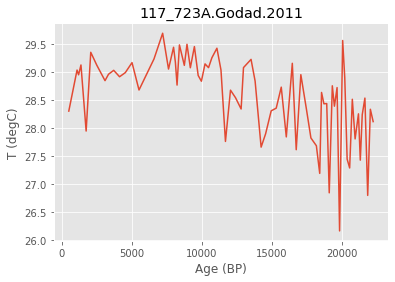

In [8]:
# Get data
index_chosen = 0
proxy_data   = np.array(proxy_ts[index_chosen]['paleoData_values']).astype(float)
proxy_ages   = np.array(proxy_ts[index_chosen]['age']).astype(float)
dataset_name = proxy_ts[index_chosen]['dataSetName']

# Make a simple figure
plt.plot(proxy_ages,proxy_data)
plt.xlabel('Age ('+proxy_ts[index_chosen]['ageUnits']+')')
plt.ylabel('T ('+proxy_ts[index_chosen]['paleoData_units']+')')
plt.title(dataset_name)
plt.show()

To get a better sense of what's in the database, let's make a function to summarize a chosen metadata key across all 1276 records.

Note: Defining functions is useful when you want to run the same code multiple times in different contexts.

In [9]:
# Print a sorted list of a selected variable
def print_sorted_list(key):
    #
    # Make a list of all values of the given key
    variable_all = []
    for i in range(n_proxies):
        try:    variable_all.append(proxy_ts[i][key])
        except: variable_all.append('not given')
    #
    # Count the number of each name
    name_words,name_counts = np.unique(variable_all,return_counts=True)
    count_sort_ind = np.argsort(-name_counts)
    name_words_sorted  = name_words[count_sort_ind]
    name_counts_sorted = name_counts[count_sort_ind]
    #
    # Print the counts
    print('===',key,'===')
    for i in range(len(name_counts_sorted)):
        print('%25s %5s' % (name_words_sorted[i],name_counts_sorted[i]))

Run the code below to display the counts for the archive types across all of the records.

In [10]:
print_sorted_list('archiveType')

=== archiveType ===
             LakeSediment   694
           MarineSediment   357
                     Peat   191
               GlacierIce    15
                   Midden    10
               Speleothem     5
                     Wood     3
                Ice-other     1


## 5. Making figures

Okay, let's make some more figures. First, let's make a map of all proxy locations. To do this, let's get the lat and lons of all of our proxy records.

In [11]:
# Create empty arrays to store the lats and lons
lats_all = np.zeros((n_proxies)); lats_all[:] = np.nan
lons_all = np.zeros((n_proxies)); lons_all[:] = np.nan

# Loop through all proxy records, storing the lats and lons in the newly-created arrays
for i in range(n_proxies):
    lats_all[i] = proxy_ts[i]['geo_meanLat']
    lons_all[i] = proxy_ts[i]['geo_meanLon']

Now, let's create two function:
- **proxy_map:** This will create a map of all proxy locations in a given region.
- **proxy_metadata:** This will print selected metadata of all proxies in a given region.

In [18]:
# A function to make a map of all proxy locations in a given region
def proxy_map(map_bounds):
    #
    # Count the number of proxy records in this region 
    n_selected = len(np.where((lons_all >= map_bounds[0]) & (lons_all <= map_bounds[1]) & (lats_all >= map_bounds[2]) & (lats_all <= map_bounds[3]))[0])
    #
    # Plot the locations of all proxy records in the region
    plt.figure(figsize=(12,20))
    ax1 = plt.subplot2grid((1,1),(0,0),projection=ccrs.PlateCarree()); ax1.set_extent(map_bounds,crs=ccrs.PlateCarree())
    ax1.scatter(lons_all,lats_all,25,c='r',marker='o',alpha=1,transform=ccrs.PlateCarree())
    ax1.coastlines()
    ax1.gridlines(color='k',linestyle='--',draw_labels=True)
    ax1.set_title('Locations of '+str(n_selected)+' proxy records',fontsize=14,loc='center')
    plt.show()

# A function to print selected metadata of all proxies in a given region.
def proxy_metadata(region_bounds):
    #
    ind_selected = np.where((lons_all >= region_bounds[0]) & (lons_all <= region_bounds[1]) & (lats_all >= region_bounds[2]) & (lats_all <= region_bounds[3]))[0]
    print('Records found in the region',region_bounds,':',len(ind_selected))
    #
    # Print some metadata for the selected proxies
    print_fmt = '%5s %30s %16s %12s %12s %10s %10s %12s %-10s'
    print(print_fmt % ('Index','dataSetName','Archive','Proxy','Variable','Lat','Lon','Season','Original_URL'))
    print(print_fmt % ('=====','===========','=======','=====','========','===','===','======','============'))
    for i in ind_selected:
        print(print_fmt % (i, \
                           proxy_ts[i]['dataSetName'], \
                           proxy_ts[i]['archiveType'], \
                           proxy_ts[i]['paleoData_proxy'], \
                           proxy_ts[i]['paleoData_variableName'], \
                           proxy_ts[i]['geo_meanLat'], \
                           proxy_ts[i]['geo_meanLon'], \
                           proxy_ts[i]['paleoData_interpretation'][0]['seasonalityGeneral'], \
                           proxy_ts[i]['originalDataUrl']))

Both of the functions above use an input list with four values: [lon_min, lon_max, lat_min, lat_min]. Let's try it:

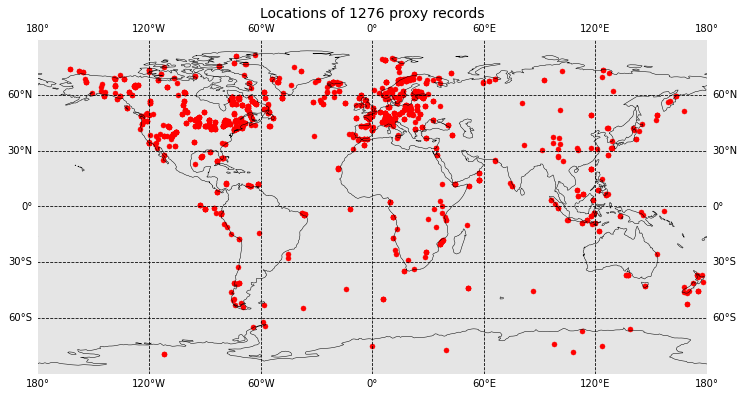

In [19]:
# Make a global map
proxy_map([-180,180,-90,90])

Now, let's use both functions to make a map and list the proxies in a particlar region. In the code below, I've selected a part of southern Asia.

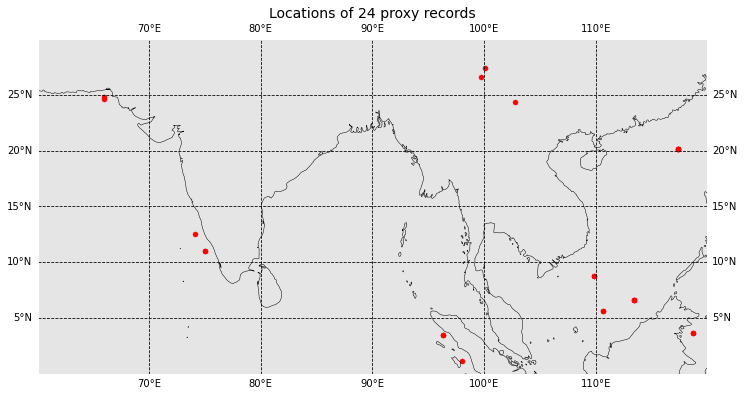

Records found in the region [60, 120, 0, 30] : 24
Index                    dataSetName          Archive        Proxy     Variable        Lat        Lon       Season Original_URL
=====                    ===========          =======        =====     ========        ===        ===       ====== ============
  367          HeihaiLake.Chang.2017     LakeSediment   chironomid  temperature      27.36     100.07   summerOnly 10.25921/4RY2-G808
  439        GIK18287_3.Kienast.2001   MarineSediment     alkenone  temperature      5.663   110.6615       annual www.ncdc.noaa.gov/paleo/study/2569
  440        GIK18287_3.Kienast.2001   MarineSediment         d18O  temperature      5.663   110.6615       annual www.ncdc.noaa.gov/paleo/study/2569
  449       GIK17940_2.Pelejero.1999   MarineSediment     alkenone  temperature    20.1167   117.3833       annual 10.1594/PANGAEA.794489
  450       GIK17940_2.Pelejero.1999   MarineSediment         d18O  temperature    20.1167   117.3833       annual 10.1594

In [20]:
# Map and list the proxies in a given region
region_selected = [60,120,0,30]  # Give values in the format [lon_min, lon_max, lat_min, lat_max]
proxy_map(region_selected)
proxy_metadata(region_selected)

Hopefully this helped you get started using LiPD files in python!